In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report

In [41]:
df = pd.read_excel("dataset_sample_sentiment_labelled.xlsx", index_col=[0]).reset_index(drop=True)
df.drop(columns='Unnamed: 0', inplace=True)
df

,content,user.location,place.name,date,id_reg,id_prov,kota,provinsi,content_cleaned,content_cleaned_translated,polarity,sentiment_pred,sentiment_actual
0,Puan: Jangan karena Masyarakat Tak Dapat Unduh...,"Gatakrejo, Nguter, Sukoharjo",NaN,2021-09-13T08:12:02+00:00,NaN,NaN,NaN,NaN,puan: jangan karena masyarakat tak dapat unduh...,"madam: not because people can't download ""pl"",...",0.0000,Netral,0.0
1,@KemenkesRI Utk toko di luar mall ... cara men...,NaN,NaN,2021-08-23T05:55:59+00:00,NaN,NaN,NaN,NaN,utk toko di luar mall ... cara mendapatkn qrc...,for shops outside the mall... how do you get t...,0.6898,Positif,-1.0
2,Apilikasi peduli lindungi sedikit mengingatkan...,"Jakarta,indonesia",NaN,2021-09-19T16:17:30+00:00,NaN,NaN,NaN,NaN,apilikasi PeduliLindungi sedikit mengingatkan ...,"the ""pl"" application reminds me a little of le...",0.0000,Netral,1.0
3,Pengarahan skuriti di mall buat syarat masuk k...,NaN,NaN,2021-08-26T15:46:28+00:00,NaN,NaN,NaN,NaN,pengarahan skuriti di mall buat syarat masuk k...,security briefing at the mall for entry requir...,0.2910,Netral,0.0
4,"@convomfs krl, mrt scan pedulilindungi aja kok",CEK 👉,NaN,2022-01-19T12:06:29+00:00,NaN,NaN,NaN,NaN,"krl, mrt scan PeduliLindungi aja kok","krl, mrt just scan ""pl""",0.0000,Netral,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,@mosidik mmm kmrn saya pcr di lab P**** hasiln...,Indonesia,NaN,2022-02-04T14:09:57+00:00,NaN,NaN,NaN,NaN,m kmrn saya pcr di lab p**** hasilnya jg g ke...,mrn now i do a test in the lab p**** the resul...,0.0000,Netral,0.0
996,"PeduliLindungi Bisa Bongkar Perselingkuhan, Ce...","Riau, Indonesia",NaN,2022-01-22T07:22:50+00:00,NaN,NaN,NaN,NaN,"PeduliLindungi bisa bongkar perselingkuhan, ce...","""pl"" can dismantle infidelity, check this sect...",0.0000,Netral,0.0
997,Pedulilindungi gue tbtb warnanya item LAH KOK ...,Indonesia,NaN,2022-02-06T18:40:14+00:00,NaN,NaN,NaN,NaN,PeduliLindungi gue tbtb warnanya item lah kok ...,"my ""pl"" tbtb is the color of the item, how com...",0.0000,Netral,0.0
998,@republikaonline Satgas ngapain aje sampai bej...,Jakarta Capital Region,NaN,2022-02-04T07:14:44+00:00,NaN,NaN,NaN,NaN,"satgas ngapain aje sampai bejibun, itu Peduli...","what is the task force doing so much, what is ...",0.0000,Netral,-1.0


cek apakah ada yang belum terlabel

In [42]:
df['sentiment_actual'].unique()

array([ 0., -1.,  1., nan])

In [45]:
with pd.option_context('display.max_colwidth', None):
    display(df[df['sentiment_actual'].isna()][['content','content_cleaned_translated','sentiment_actual']])

,content,content_cleaned_translated,sentiment_actual
40,"-rek vksn adekku seng kedua malah jd seng pertama, dan seng pertama ga onok sertine. Dan saiki relogin peduli lindungi malah ilang kabeh\n\nLapor nang endi yo rek?","-rek vksn adekku seng kedua malam jd seng pertama, dan seng pertama ga onok sertine. and now relogin ""pl"" even lost all reports where yo rek?",NaN
150,Ket jaman vaksin vaksinan sampe saiki ga download apk peduli lindungi 😂,"when the vaccine era was up until now i didn't download the ""pl"" apk 😂",NaN
163,@SmgMenfess2 Dftr ning peduli lindungi ki koyok mung salah satu syarat nggo vksin. Syarat selanjute ya koe kudu nggolek nggon vaksin ndes,"dftr in ""pl"" seems to be just one of the requirements for using the vaccine. the next requirement is yes you have to look for a ndes vaccine",NaN
690,Aku gak duwe aplikasi PeduliLindungi. Berarti aku gak onok sing peduli ngonoa?,"i don't have a ""pl"" application. does that mean i don't care who cares?",NaN
981,"Lalu di Peduli Lindungi, belum muncul hasilnya sampai sekarang. 😂😂😂 https://t.co/KrIsx5aWnt","then in ""pl"", no results appear until now. 😂😂😂",NaN


In [46]:
df['sentiment_actual'][40] = 0
df['sentiment_actual'][150] = 0
df['sentiment_actual'][163] = 0
df['sentiment_actual'][690] = -1
df['sentiment_actual'][981] = -1

C:\Users\Ren\AppData\Local\Temp\ipykernel_32716\1434022184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_actual'][40] = 0
C:\Users\Ren\AppData\Local\Temp\ipykernel_32716\1434022184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_actual'][150] = 0
C:\Users\Ren\AppData\Local\Temp\ipykernel_32716\1434022184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_actual'][163] = 0
C:\Users\Re

In [47]:
display(df[df['sentiment_actual'].isna()]['sentiment_actual'].count())
display(df['sentiment_actual'].unique())

0

array([ 0., -1.,  1.])

In [48]:
df.loc[df['sentiment_actual']==0, 'sentiment_actual_label'] = 'Netral'
df.loc[df['sentiment_actual']==-1, 'sentiment_actual_label'] = 'Negatif'
df.loc[df['sentiment_actual']==1, 'sentiment_actual_label'] = 'Positif'

In [49]:
df

,content,user.location,place.name,date,id_reg,id_prov,kota,provinsi,content_cleaned,content_cleaned_translated,polarity,sentiment_pred,sentiment_actual,sentiment_actual_label
0,Puan: Jangan karena Masyarakat Tak Dapat Unduh...,"Gatakrejo, Nguter, Sukoharjo",NaN,2021-09-13T08:12:02+00:00,NaN,NaN,NaN,NaN,puan: jangan karena masyarakat tak dapat unduh...,"madam: not because people can't download ""pl"",...",0.0000,Netral,0.0,Netral
1,@KemenkesRI Utk toko di luar mall ... cara men...,NaN,NaN,2021-08-23T05:55:59+00:00,NaN,NaN,NaN,NaN,utk toko di luar mall ... cara mendapatkn qrc...,for shops outside the mall... how do you get t...,0.6898,Positif,-1.0,Negatif
2,Apilikasi peduli lindungi sedikit mengingatkan...,"Jakarta,indonesia",NaN,2021-09-19T16:17:30+00:00,NaN,NaN,NaN,NaN,apilikasi PeduliLindungi sedikit mengingatkan ...,"the ""pl"" application reminds me a little of le...",0.0000,Netral,1.0,Positif
3,Pengarahan skuriti di mall buat syarat masuk k...,NaN,NaN,2021-08-26T15:46:28+00:00,NaN,NaN,NaN,NaN,pengarahan skuriti di mall buat syarat masuk k...,security briefing at the mall for entry requir...,0.2910,Netral,0.0,Netral
4,"@convomfs krl, mrt scan pedulilindungi aja kok",CEK 👉,NaN,2022-01-19T12:06:29+00:00,NaN,NaN,NaN,NaN,"krl, mrt scan PeduliLindungi aja kok","krl, mrt just scan ""pl""",0.0000,Netral,0.0,Netral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,@mosidik mmm kmrn saya pcr di lab P**** hasiln...,Indonesia,NaN,2022-02-04T14:09:57+00:00,NaN,NaN,NaN,NaN,m kmrn saya pcr di lab p**** hasilnya jg g ke...,mrn now i do a test in the lab p**** the resul...,0.0000,Netral,0.0,Netral
996,"PeduliLindungi Bisa Bongkar Perselingkuhan, Ce...","Riau, Indonesia",NaN,2022-01-22T07:22:50+00:00,NaN,NaN,NaN,NaN,"PeduliLindungi bisa bongkar perselingkuhan, ce...","""pl"" can dismantle infidelity, check this sect...",0.0000,Netral,0.0,Netral
997,Pedulilindungi gue tbtb warnanya item LAH KOK ...,Indonesia,NaN,2022-02-06T18:40:14+00:00,NaN,NaN,NaN,NaN,PeduliLindungi gue tbtb warnanya item lah kok ...,"my ""pl"" tbtb is the color of the item, how com...",0.0000,Netral,0.0,Netral
998,@republikaonline Satgas ngapain aje sampai bej...,Jakarta Capital Region,NaN,2022-02-04T07:14:44+00:00,NaN,NaN,NaN,NaN,"satgas ngapain aje sampai bejibun, itu Peduli...","what is the task force doing so much, what is ...",0.0000,Netral,-1.0,Negatif


In [54]:
with pd.option_context('display.max_colwidth', None):
    display(df[(df['sentiment_actual_label'] != df['sentiment_pred']) & (df['sentiment_pred'] == 'Netral')][['content','sentiment_pred','sentiment_actual_label']].tail(10))

,content,sentiment_pred,sentiment_actual_label
932,"Ruang publik yg terhubung ke aplikasi PeduliLindungi akan terus bertambah, jadi kedepannya aplikasi ini akan sangat berguna... #PLRedamPandemi \nhttps://t.co/YGMtvVTsW1",Netral,Positif
937,Penggunaan aplikasi PeduliLindungi bertujuan untuk menjaga data pribadi yang ada dalam sertifikat vaksin. https://t.co/csS2ppA08x,Netral,Positif
941,e Hac ku sdh jd korban pastinya.... \nTrus pkbrnya pula si peduli lindungi? \n\nSpeechless 🤦‍♀️🤷‍♀️ https://t.co/qJduxwsfFH,Netral,Negatif
952,"@mnwyudi_01 @KemenkesRI Coba agan cek di aplikasi pedulilindungi lalu daftar akun, isi semua profile infonya seperti Nama,NIK,Tanggal Lahir,Email dan nomor telepon. Setelah itu coba cek lagi di kolom 'Sertifikat Vaksin', biasanya ada.",Netral,Positif
958,@Nbilanctz Coba daftar di pedulilindungi bil,Netral,Positif
968,"@bertanyarl ga sih, kan mau masuk rumah gw kudu scan barcode PeduliLindungi dulu.",Netral,Negatif
974,@bundabaik 119 jg gak bisa dihub.\nPetugas2 vaksin sih ramah dan helpfull.\nSampe dikasih liat kalo mereka (pihak penyelenggara vaksin) sdh input data.\nTp pas dicek ke aplikasi pedulilindungi lgsg ZONK,Netral,Positif
979,"@KompasTV Tambahin dong\n\nKebijakan persyaratan vaksin jg ga berguna, krn tidak dapat menghentikan penularan\n\nDan ga semua orang jg punya HP utk install aplikasi pedulilindungi",Netral,Negatif
993,@0401soleil Wkwkw emg suka gitu kak. Dateng aja ke puskesmas tempat kaka vaksin pertama terus tunjukin jadwal dari pedulilindungi ajaa. Biasanya langsung kokk,Netral,Positif
998,"@republikaonline Satgas ngapain aje sampai bejibun, itu peduli lindungi fungsinya apa?",Netral,Negatif


In [55]:
print(classification_report(df['sentiment_actual_label'], df['sentiment_pred']))

              precision    recall  f1-score   support

     Negatif       0.70      0.63      0.66       193
      Netral       0.82      0.86      0.84       683
     Positif       0.48      0.44      0.46       124

    accuracy                           0.76      1000
   macro avg       0.67      0.64      0.65      1000
weighted avg       0.76      0.76      0.76      1000



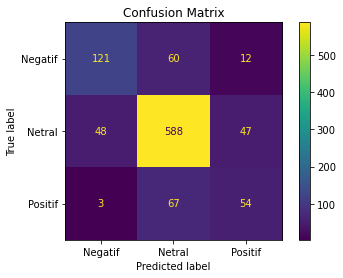

In [56]:
ConfusionMatrixDisplay.from_predictions(df['sentiment_actual_label'], df['sentiment_pred'])
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()